<a href="https://colab.research.google.com/github/Sruthi23Yaradi/InternshipProjects/blob/main/Rainfall_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading the Dataset

In [ ]:
ds = pd.read_csv("weatherAUS.csv")
print(ds.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

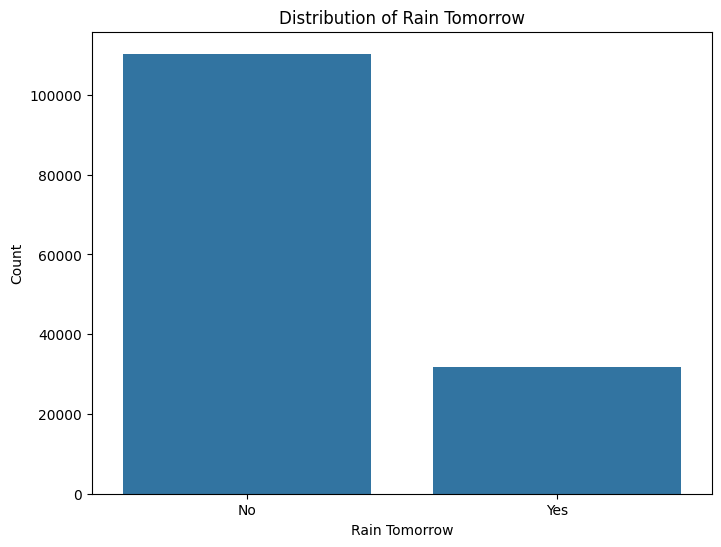

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=ds['RainTomorrow'])
plt.title('Distribution of Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.show()

In [ ]:
x = ds.iloc[:, [1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]].values
y = ds.iloc[:, -1].values

In [ ]:
print(x)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [ ]:
print(y)

['No' 'No' 'No' ... 'No' 'No' nan]


In [ ]:
y = y.reshape(-1, 1)
print(y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


Handling the missing or invalid values in dataset

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x = imp.fit_transform(x)
y = imp.fit_transform(y)

Encoding the non-numerical data

In [ ]:
#Since ML algoritms can deal with only numerical data, we need to encode the string data
from sklearn.preprocessing import LabelEncoder, StandardScaler

l1=LabelEncoder()
x[:,0]=l1.fit_transform(x[:,0])
l2=LabelEncoder()
x[:,4]=l2.fit_transform(x[:,4])
l3=LabelEncoder()
x[:,6]=l3.fit_transform(x[:,6])
l4=LabelEncoder()
x[:,7]=l4.fit_transform(x[:,7])
l5=LabelEncoder()
x[:,-1]=l5.fit_transform(x[:,-1])

l6=LabelEncoder()
y =l6.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(x)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


In [ ]:
print(y)

[0 0 0 ... 0 0 0]


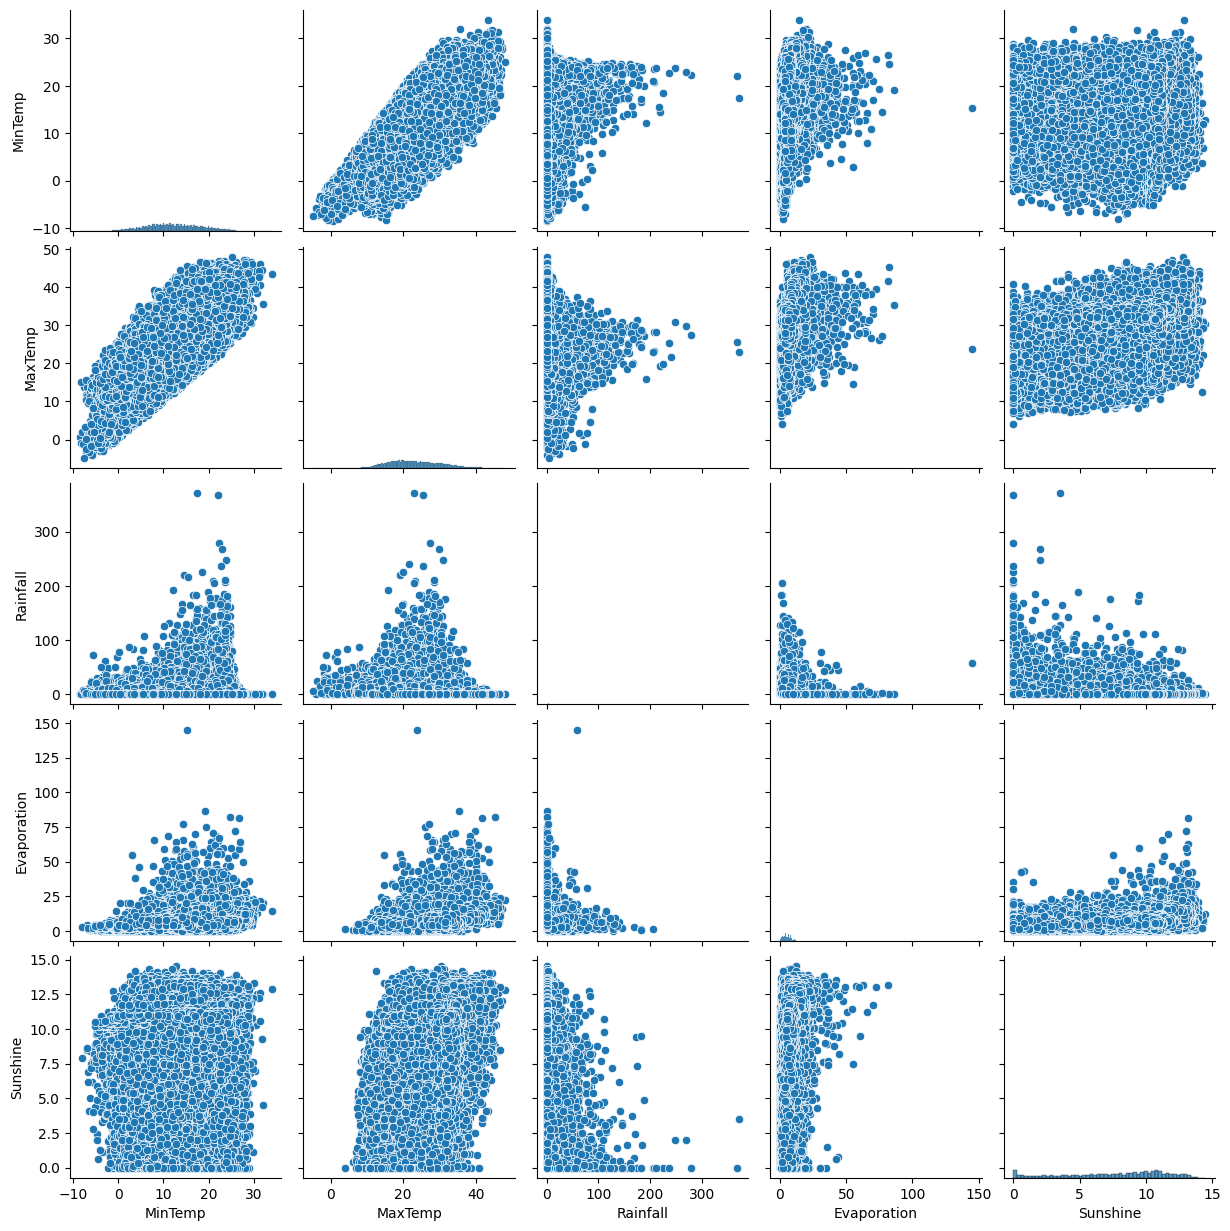

In [ ]:
sns.pairplot(ds[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'RainTomorrow']])
plt.show()


Splitting the data into training and test sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Training the model

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Evaluate the model

In [ ]:
print("Training Score:", model.score(x_train, y_train))
y_pred = model.predict(x_test)
print("Predictions:", y_pred)
print("Actual:", y_test)

Training Score: 0.3004754111784176
Predictions: [0.28741949 0.26368635 0.23270103 ... 0.50457147 0.30760933 0.00633319]
Actual: [1 1 0 ... 1 0 0]


In [ ]:
print(y_pred.shape)
print(y_test.shape)

(29092,)
(29092,)


In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = l6.inverse_transform(y_pred)


In [ ]:
y_test = l6.inverse_transform(y_test)

In [ ]:
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

In [ ]:
print(y_test)

[['Yes']
 ['Yes']
 ['No']
 ...
 ['Yes']
 ['No']
 ['No']]


In [ ]:
print(y_pred)

[['No']
 ['No']
 ['No']
 ...
 ['Yes']
 ['No']
 ['No']]


In [ ]:
df = np.concatenate((y_test, y_pred), axis=1)
df1 = pd.DataFrame(df, columns=['Rain Tomorrow', 'Prediction'])
print(df1)

      Rain Tomorrow Prediction
0               Yes         No
1               Yes         No
2                No         No
3                No         No
4                No         No
...             ...        ...
29087            No        Yes
29088            No         No
29089           Yes        Yes
29090            No         No
29091            No         No

[29092 rows x 2 columns]


Calculating the Accuracy

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8391654062972639


Combined line and scatter plot for Actual vs Predicted Values

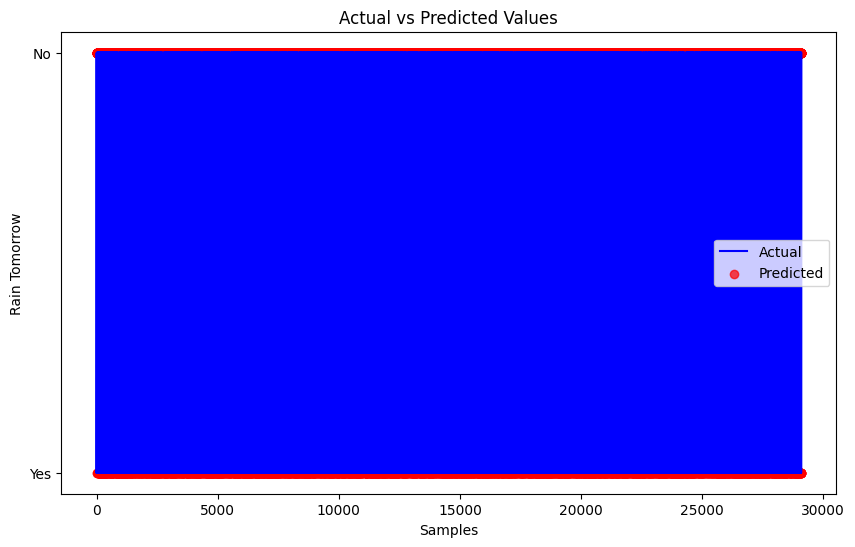

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.flatten(), color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred.flatten(), color='red', alpha=0.7, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Rain Tomorrow')
plt.show()

Confusion Matrix

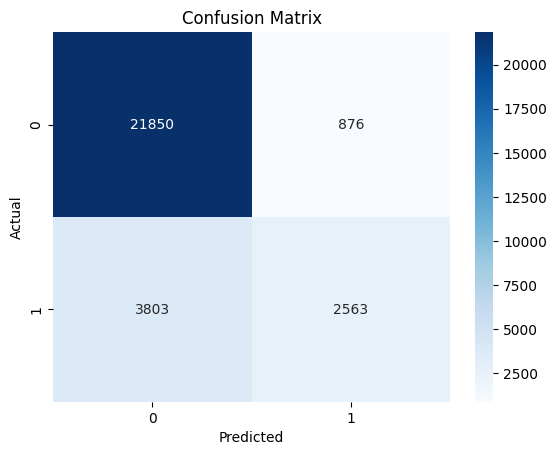

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report

In [ ]:
print("Classification Report:")
class_report=classification_report(y_test, y_pred)
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.96      0.90     22726
         Yes       0.75      0.40      0.52      6366

    accuracy                           0.84     29092
   macro avg       0.80      0.68      0.71     29092
weighted avg       0.83      0.84      0.82     29092

